## Chapter 3 - Clipping and Extracting Spatial Data

In [2]:
# Import modules
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Polygon

In [5]:
# Load data
# /Users/tnmthai/Documents/GitHub/gis-medium/Data/_static
# County boundaries
# Source: https://opendata.mtc.ca.gov/datasets/san-francisco-bay-region-counties-clipped?geometry=-125.590%2C37.123%2C-119.152%2C38.640
counties = gpd.read_file("Data/_static/e_vector_shapefiles/sf_bay_counties/sf_bay_counties.shp")

# Well locations
# Source: https://gis.data.ca.gov/datasets/3a3e681b894644a9a95f9815aeeeb57f_0?geometry=-123.143%2C36.405%2C-119.230%2C37.175
# Modified by author so that only the well locations within the counties and the surrounding 50 km were kept
wells = gpd.read_file("Data/_static/e_vector_shapefiles/sf_bay_wells_50km/sf_bay_wells_50km.shp")

# Reproject data to NAD83(HARN) / California Zone 3
# https://spatialreference.org/ref/epsg/2768/
proj = 2768
counties = counties.to_crs(proj)
wells = wells.to_crs(proj)

In [11]:
# Create list of coordinate pairs
coordinates = [[1790787, 736108], [1929652, 736108], [1929652, 598414], [1790787, 598414]]

# Create a Shapely polygon from the coordinate-tuple list
poly_shapely = Polygon(coordinates)

# Create a dictionary with needed attributes and required geometry column
attributes_df = {'Attribute': ['name1'], 'geometry': poly_shapely}

# Convert shapely object to a GeoDataFrame
poly = gpd.GeoDataFrame(attributes_df, geometry = 'geometry', crs = "EPSG:2768")

In [12]:
def display_table(table_name, attribute_table):
    '''Display the first and last five rows of attribute table.'''

    # Print title
    print("Attribute Table: {}".format(table_name))

    # Print number of rows and columns
    print("\nTable shape (rows, columns): {}".format(attribute_table.shape))

    # Display first two rows of attribute table
    print("\nFirst two rows:")
    display(attribute_table.head(2))

    # Display last two rows of attribute table
    print("\nLast two rows:")
    display(attribute_table.tail(2))


def plot_df(result_name, result_df, result_geom_type, area = None):
    '''Plot the result on a map and add the outlines of the original shapefiles.'''

    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))

    # Plot data depending on vector type
    # For points
    if result_geom_type == "point":

        # Plot data
        counties.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
        wells.plot(ax = ax, marker = 'o', color = 'dimgray', markersize = 3)
        result_df.plot(ax = ax, marker = 'o', color = 'dodgerblue', markersize = 3)

    # For polygons
    else:

        # Plot overlay data
        result_df.plot(ax = ax, cmap = 'Set2', edgecolor = 'black')

        # Plot outlines of original shapefiles
        counties.plot(ax = ax, color = 'none', edgecolor = 'dimgray')

    # Add additional outlined boundary if specified
    if area is not None:

        # Plot data
        area.plot(ax = ax, color = 'none', edgecolor = 'lightseagreen', linewidth = 3)

    # Else, pass
    else:
        pass

    # Stylize plots
    plt.style.use('bmh')

    # Set title
    ax.set_title(result_name, fontdict = {'fontsize': '15', 'fontweight' : '3'})

Text(0.5, 1.0, 'San Francisco Bay Area')

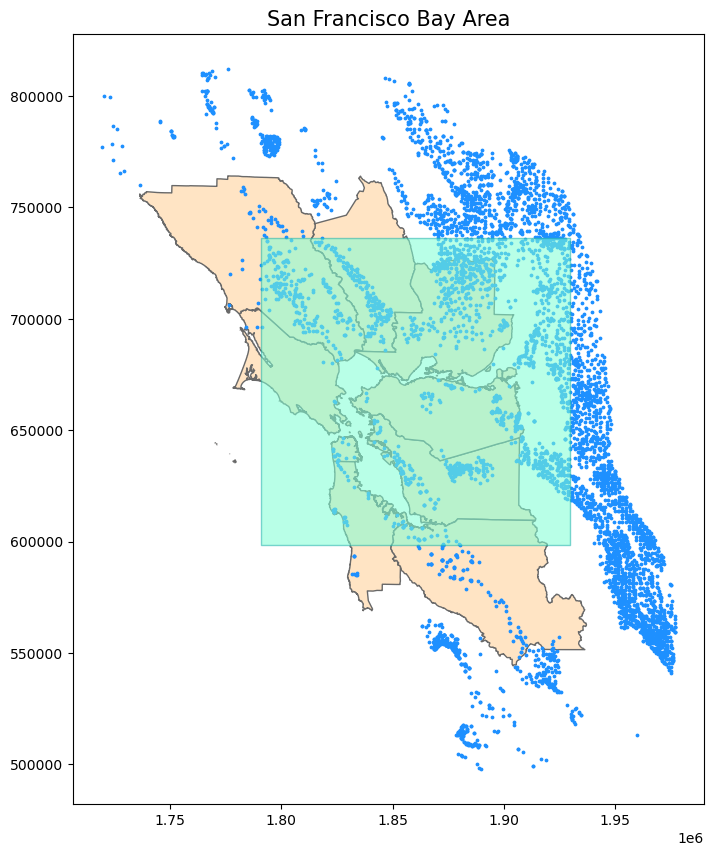

In [13]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
counties.plot(ax = ax, color = 'bisque', edgecolor = 'dimgray')
wells.plot(ax = ax, marker = 'o', color = 'dodgerblue', markersize = 3)
poly.plot(ax = ax, color = 'aquamarine', edgecolor = 'lightseagreen', alpha = 0.55)

# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('San Francisco Bay Area', fontdict = {'fontsize': '15', 'fontweight' : '3'})

/Users/tnmthai/miniconda3/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


,coname,geometry
6,Santa Clara County,"MULTIPOLYGON (((1858743.389 607583.832, 185874..."
5,San Mateo County,"MULTIPOLYGON (((1850037.244 614954.640, 185085..."
0,Alameda County,"MULTIPOLYGON (((1860073.077 612066.462, 185990..."
4,San Francisco County,"MULTIPOLYGON (((1834350.912 641735.721, 183437..."
1,Contra Costa County,"MULTIPOLYGON (((1836498.140 656511.674, 183649..."
2,Marin County,"MULTIPOLYGON (((1830505.126 653828.366, 183051..."
7,Solano County,"MULTIPOLYGON (((1875491.252 673069.363, 187548..."
8,Sonoma County,"POLYGON ((1813605.098 736060.762, 1813555.586 ..."
3,Napa County,"POLYGON ((1860170.736 724644.473, 1860169.835 ..."


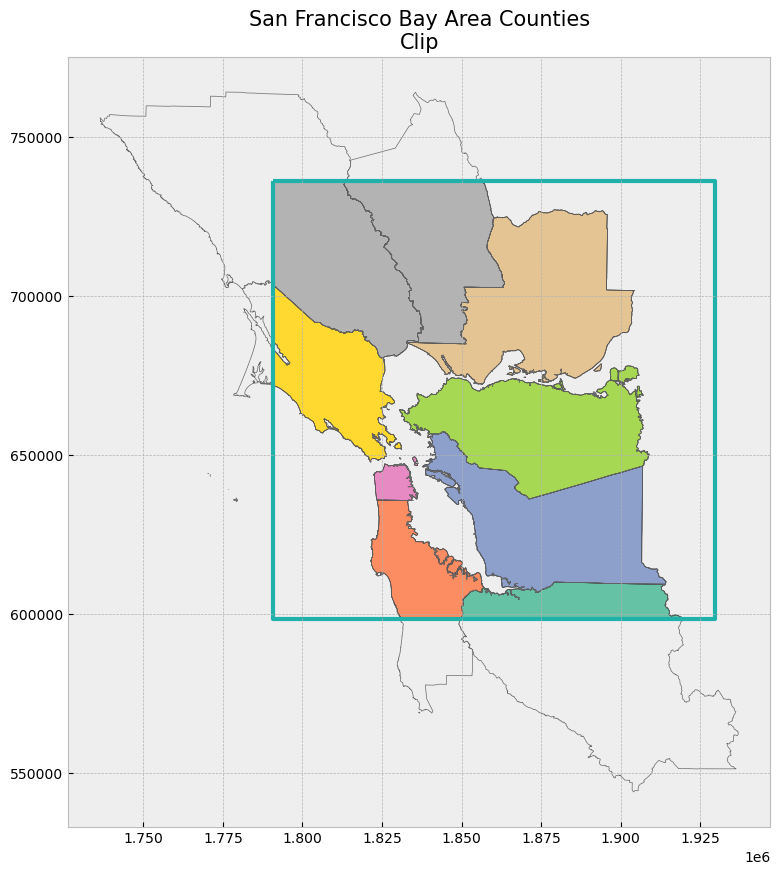

In [14]:
# Clip data
clip_counties = gpd.clip(counties, poly)

# Display attribute table
display(clip_counties)

# Plot clip
plot_df(result_name = "San Francisco Bay Area Counties\nClip", result_df = clip_counties, result_geom_type = "polygon", area = poly)

,WELL_NAME,WELL_USE,WELL_TYPE,WELL_DEPTH,geometry
4764,NaN,Unknown,Unknown,0,POINT (1928106.578 619294.408)
4733,NaN,Unknown,Unknown,0,POINT (1927444.679 619366.782)
4391,NaN,Unknown,Unknown,0,POINT (1927051.274 621834.123)
4554,NaN,Unknown,Unknown,0,POINT (1926420.722 622427.938)
4553,NaN,Unknown,Unknown,0,POINT (1926420.722 622427.938)
...,...,...,...,...,...
5669,NaN,Unknown,Unknown,200,POINT (1824748.040 729726.154)
4077,NaN,Residential,Unknown,175,POINT (1823812.719 730423.625)
4076,NaN,Residential,Unknown,210,POINT (1823821.913 730445.634)
1365,202,Residential,Single Well,280,POINT (1830194.589 731335.971)


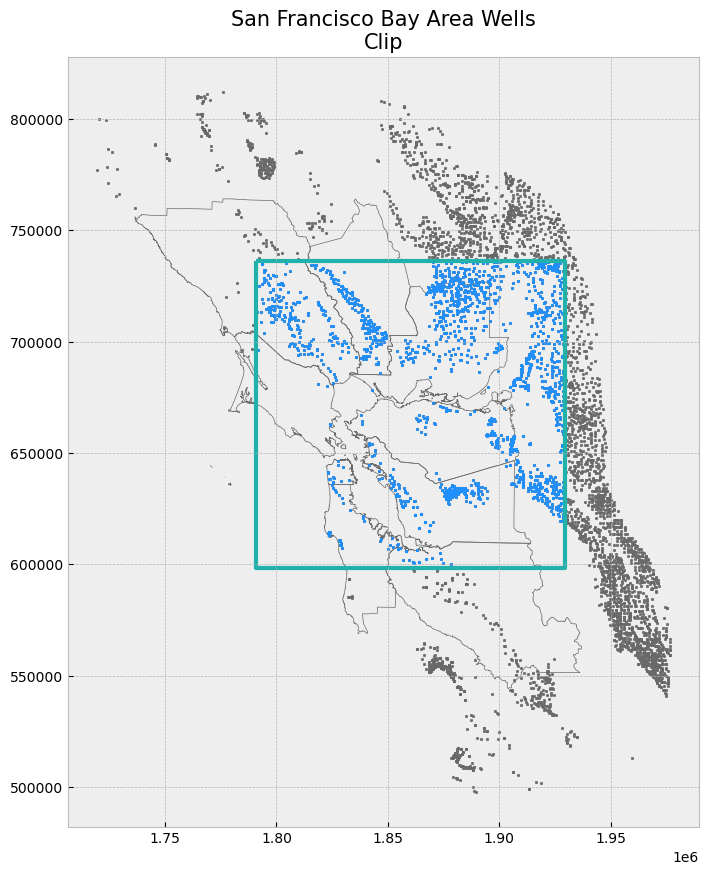

In [15]:
# Clip data
clip_wells = gpd.clip(wells, poly)

# Display attribute table
display(clip_wells)

# Plot clip
plot_df(result_name = "San Francisco Bay Area Wells\nClip", result_df = clip_wells, result_geom_type = "point", area = poly)

In [16]:
# Display attribute table
display(wells.head(2))

,WELL_NAME,WELL_USE,WELL_TYPE,WELL_DEPTH,geometry
0,2400064-001,Public Supply,Single Well,0,POINT (1968290.923 592019.918)
1,2400099-001,Public Supply,Single Well,0,POINT (1969113.543 595876.691)


In [17]:
# Select wells that are public supply
wells_public = wells[(wells["WELL_USE"] == "Public Supply")]

# Display first two and last two rows of attribute table
display_table(table_name = "San Francisco Bay Area Wells - Public Supply", attribute_table = wells_public)

Attribute Table: San Francisco Bay Area Wells - Public Supply

Table shape (rows, columns): (33, 5)

First two rows:


,WELL_NAME,WELL_USE,WELL_TYPE,WELL_DEPTH,geometry
0,2400064-001,Public Supply,Single Well,0,POINT (1968290.923 592019.918)
1,2400099-001,Public Supply,Single Well,0,POINT (1969113.543 595876.691)



Last two rows:


,WELL_NAME,WELL_USE,WELL_TYPE,WELL_DEPTH,geometry
3368,Aptos Creek PW,Public Supply,Single Well,713,POINT (1875127.938 553764.966)
3369,Country Club PW,Public Supply,Single Well,495,POINT (1877219.818 552137.819)


In [18]:
# Select wells that are public supply and have a depth greater than 50 ft
wells_public_deep = wells[(wells["WELL_USE"] == "Public Supply") & (wells["WELL_DEPTH"] > 50)]

# Display first two and last two rows of attribute table
display_table(table_name = "San Francisco Bay Area Wells - Public Supply with Depth Greater than 50 ft", attribute_table = wells_public_deep)

Attribute Table: San Francisco Bay Area Wells - Public Supply with Depth Greater than 50 ft

Table shape (rows, columns): (24, 5)

First two rows:


,WELL_NAME,WELL_USE,WELL_TYPE,WELL_DEPTH,geometry
919,Granite Way PW,Public Supply,Single Well,670,POINT (1875403.340 554078.279)
1082,Aptos Jr. High 2 PW,Public Supply,Single Well,590,POINT (1876872.389 553821.138)



Last two rows:


,WELL_NAME,WELL_USE,WELL_TYPE,WELL_DEPTH,geometry
3368,Aptos Creek PW,Public Supply,Single Well,713,POINT (1875127.938 553764.966)
3369,Country Club PW,Public Supply,Single Well,495,POINT (1877219.818 552137.819)


In [19]:
# Select wells that are public supply and have a depth greater than 50 ft OR are residential
wells_public_deep_residential = wells[((wells["WELL_USE"] == "Public Supply") & (wells["WELL_DEPTH"] > 50)) | (wells["WELL_USE"] == "Residential")]

# Display first two and last two rows of attribute table
display_table(table_name = "San Francisco Bay Area Wells - Public Supply with Depth Greater than 50 ft or Residential", attribute_table = wells_public_deep_residential)

Attribute Table: San Francisco Bay Area Wells - Public Supply with Depth Greater than 50 ft or Residential

Table shape (rows, columns): (725, 5)

First two rows:


,WELL_NAME,WELL_USE,WELL_TYPE,WELL_DEPTH,geometry
137,NaN,Residential,Unknown,78,POINT (1886296.744 730378.969)
138,NaN,Residential,Unknown,80,POINT (1877320.295 730464.652)



Last two rows:


,WELL_NAME,WELL_USE,WELL_TYPE,WELL_DEPTH,geometry
6032,GV FARM,Residential,Single Well,67,POINT (1855297.377 693189.634)
6033,NaN,Residential,Unknown,76,POINT (1841755.238 707939.225)
